<a href="https://colab.research.google.com/github/warrenshiv/CalCOFI_Data_Analysis/blob/main/Ass_Part2_Task1_ANOVA_FirstNameLastName.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Name:
# Last Name:

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import matplotlib.pyplot as plt
from scipy import stats

# Import Data

In [3]:
df=pd.read_csv(r'/content/bottle.csv',low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# Data management

In [ ]:
df.head(5)

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500000,33.440000,NaN,25.649000,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460000,33.440000,NaN,25.656000,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460000,33.437000,NaN,25.654000,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450000,33.420000,NaN,25.643000,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450000,33.421000,NaN,25.643000,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create a new categorical variable based on Depthm

In [4]:
df['Depth_Category'] = pd.cut(df['Depthm'], bins=[0, 50, 200, 500], labels=['Shallow', 'Medium', 'Deep'])
df[['Depthm', 'Depth_Category']].head(10)

,Depthm,Depth_Category
0,0,NaN
1,8,Shallow
2,10,Shallow
3,19,Shallow
4,20,Shallow
5,30,Shallow
6,39,Shallow
7,50,Shallow
8,58,Medium
9,75,Medium


# Remove rows with missing values in the relevant columns

In [5]:
df = df.dropna(subset=['Depth_Category', 'T_degC'])

# Box Plot

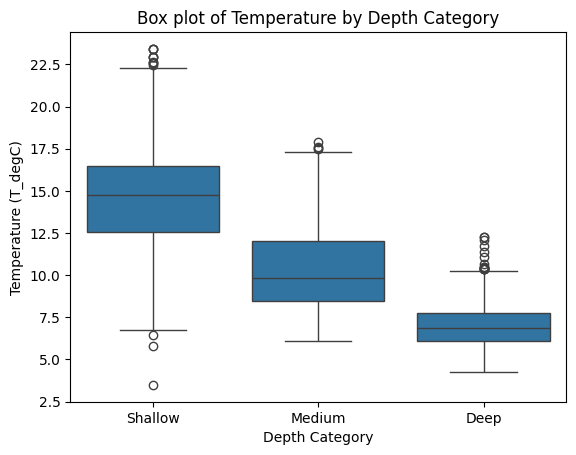

In [6]:
sns.boxplot(x='Depth_Category', y='T_degC', data=df)
plt.title('Box plot of Temperature by Depth Category')
plt.xlabel('Depth Category')
plt.ylabel('Temperature (T_degC)')
plt.show()

# ANOVA

In [7]:
anova_result = stats.f_oneway(df[df['Depth_Category'] == 'Shallow']['T_degC'],
                              df[df['Depth_Category'] == 'Medium']['T_degC'],
                              df[df['Depth_Category'] == 'Deep']['T_degC'])


In [8]:
# Print results
print('F-statistics:', anova_result.statistic)
print('p-value:', anova_result.pvalue)

F-statistics: 10204.508956728
p-value: 0.0


In [9]:
# Calculate mean and standard deviation for each category
mean_values = df.groupby('Depth_Category')['T_degC'].mean()
std_values = df.groupby('Depth_Category')['T_degC'].std()

print('\nMean values:')
print(mean_values)
print('\nSTD values:')
print(std_values)


Mean values:
Depth_Category
Shallow   14.561883
Medium    10.435225
Deep       6.961586
Name: T_degC, dtype: float64

STD values:
Depth_Category
Shallow   2.815272
Medium    2.478411
Deep      1.206099
Name: T_degC, dtype: float64
